# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
from sklearn import metrics

In [2]:
warnings.filterwarnings('ignore')

# Data Collection and Processing

In [3]:
data = pd.read_csv('Train.csv')
# first 5 rows of the dataframe
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# number of data points & number of features
data.shape

(8523, 12)

In [5]:
#Printing Column names
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
#Identifying the shape of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Getting  information about dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#Check Null Values
data.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Checking any Duplicates values
data.duplicated().any()

False

## Exploratory Data Analysis - EDA

### Univariate Imputation

### 1) Numerical columns

In [10]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


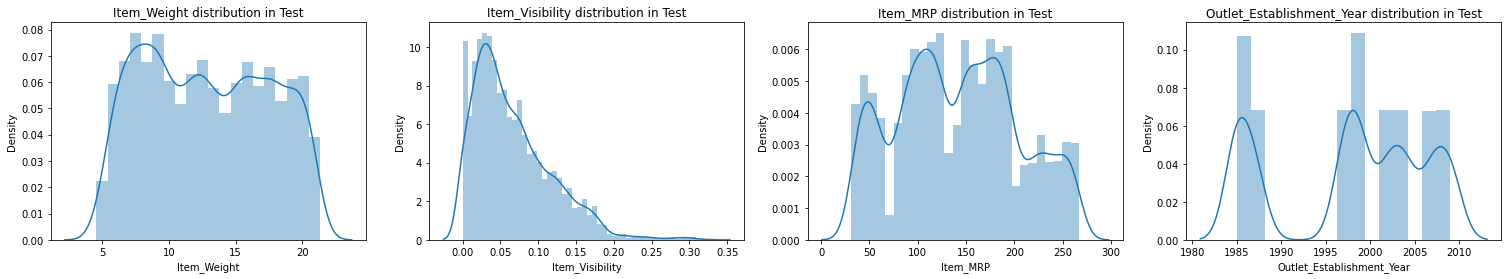

In [12]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']):
    sns.distplot(data[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test')

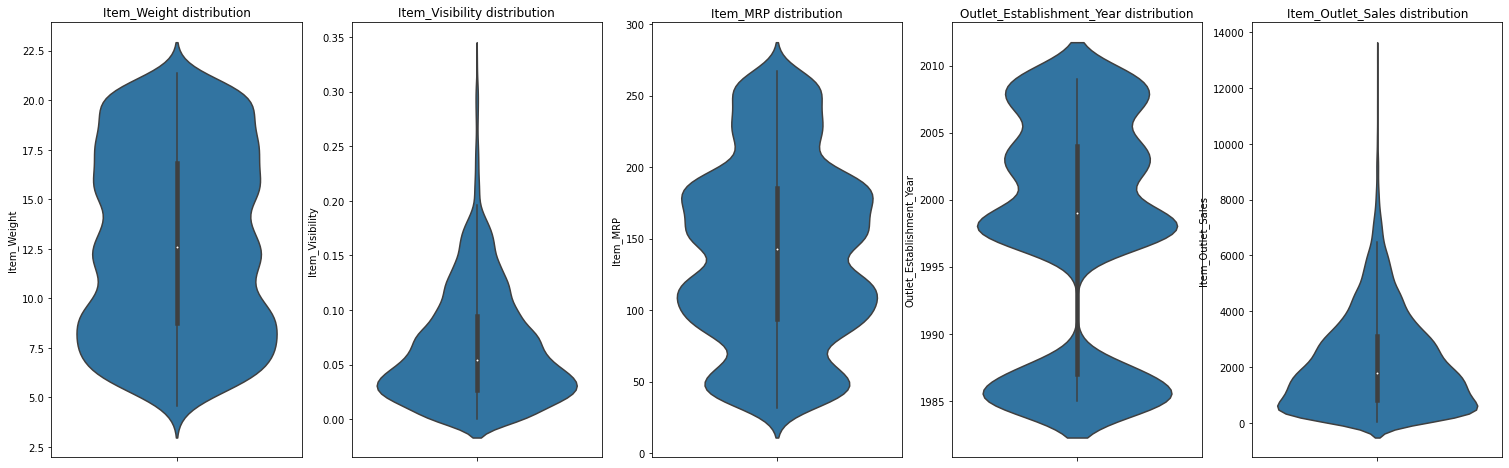

In [13]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.violinplot(data=data, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

### 2) Catagorical Columns

In [14]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
categorical_cols_to_display = [ 
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type'
]

for col in categorical_cols_to_display:
    print(f"Number of values in the '{col}' column is:\n{data[col].value_counts()}")
    print("-" * 60)  # For a consistent separator length

Number of values in the 'Item_Fat_Content' column is:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
Number of values in the 'Item_Type' column is:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
------------------------------------------------------------
Number of values in the 'Outlet_Size' column is:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
------------------------

In [16]:
print(data['Outlet_Location_Type'].unique().tolist())

['Tier 1', 'Tier 3', 'Tier 2']


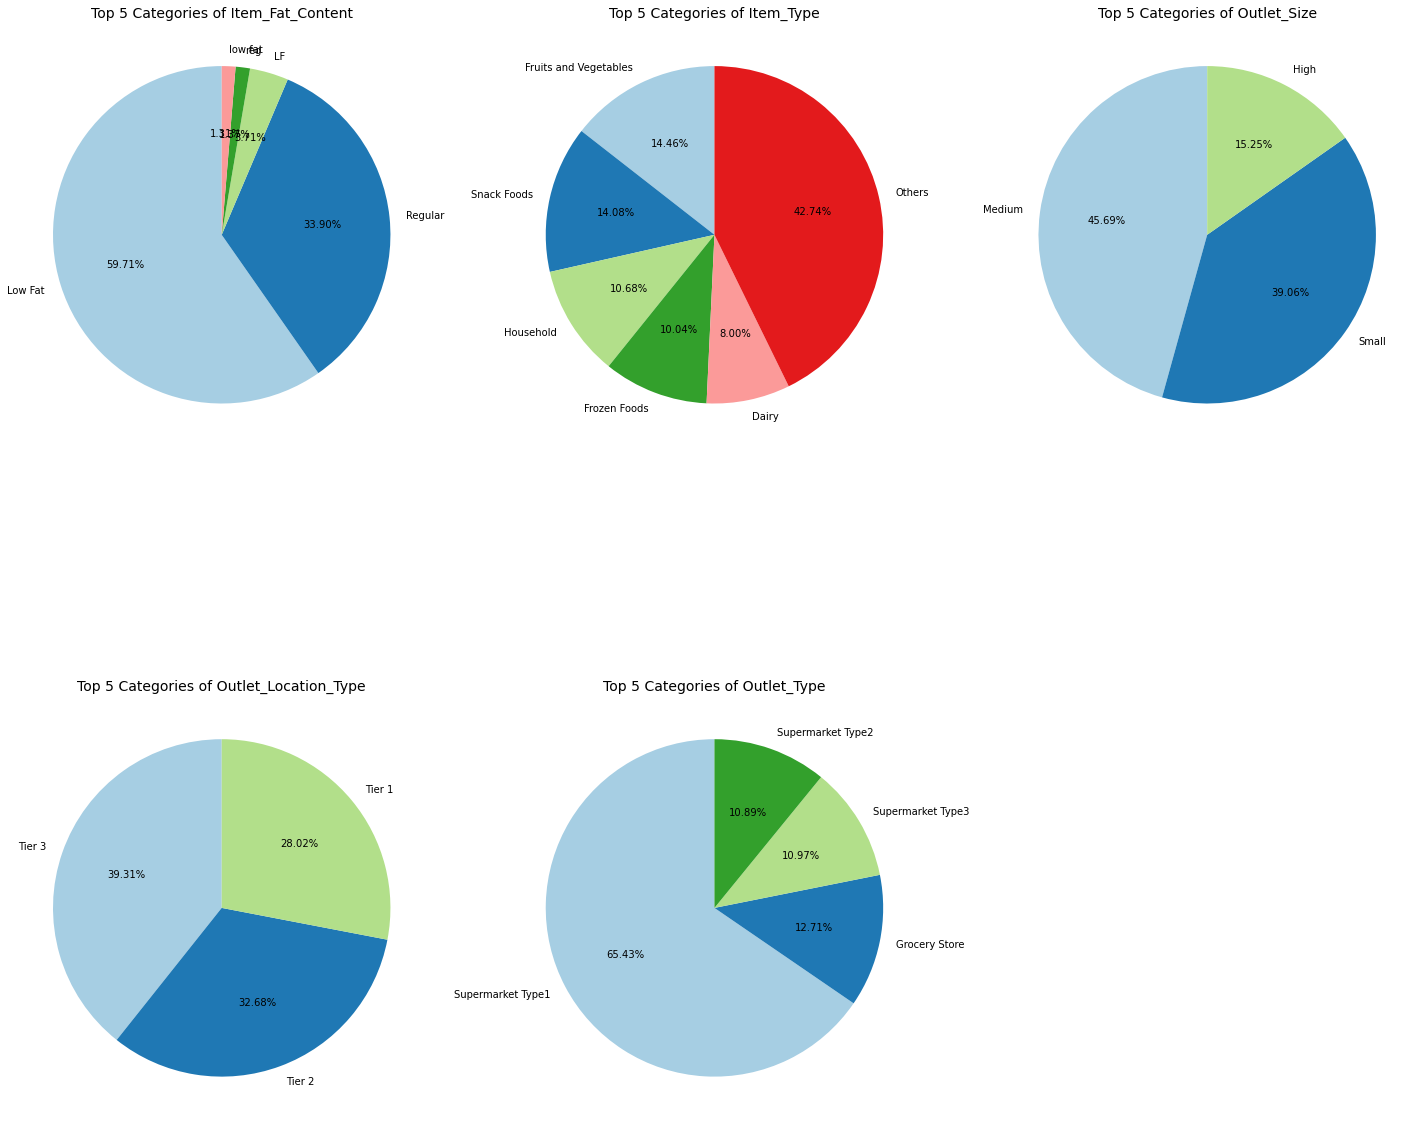

In [17]:
# Define a function to filter and plot the top N categories
def plot_top_categories(data, col, ax, top_n=5):
    value_counts = data[col].value_counts()
    
    if len(value_counts) > top_n:
        top_values = value_counts.nlargest(top_n)
        others_value = value_counts.iloc[top_n:].sum()
        top_values['Others'] = others_value
    else:
        top_values = value_counts

    top_values.plot(
        kind="pie", 
        autopct="%.2f%%", 
        ax=ax, 
        labels=top_values.index, 
        colors=plt.cm.Paired.colors, 
        startangle=90
    )
    ax.set_title(f'Top {top_n} Categories of {col}', fontsize=14)
    ax.set_ylabel('')  # Hide y-label for better aesthetics

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
ax = ax.flatten()  # Flatten the array for easy indexing

# Categorical columns to display
categorical_cols_to_display = [
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type'
]

# Plot each categorical column
for index, col in enumerate(categorical_cols_to_display):
    plot_top_categories(data, col, ax[index], top_n=5)

# Remove any unused subplots (in case there are fewer than 6 plots)
if len(categorical_cols_to_display) < len(ax):
    for i in range(len(categorical_cols_to_display), len(ax)):
        fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

## Bivariate Analysis

### 1) Numarical

In [18]:
target = "Item_Outlet_Sales"

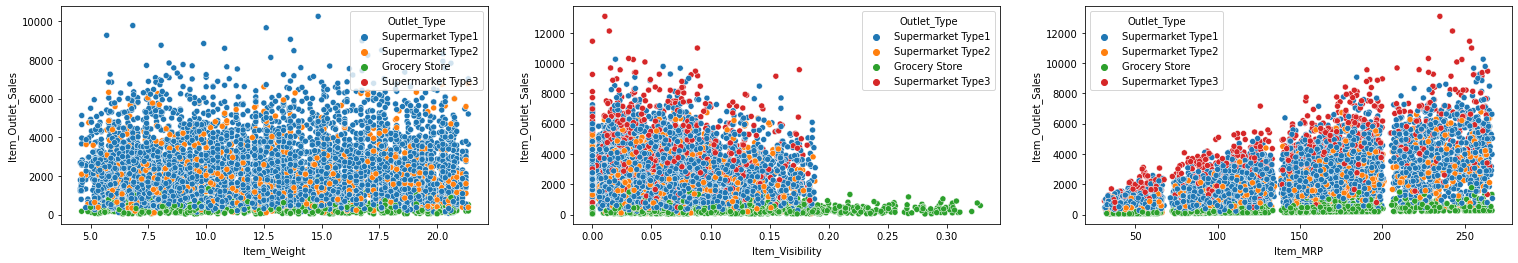

In [19]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=data,x=col, y=target, ax=ax[index], hue='Outlet_Type')

### 2) Catagorical

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

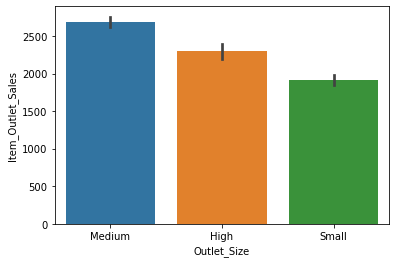

In [20]:
sns.barplot(data=data, x='Outlet_Size', y=target)

### Handling Missing Values

•OutLet_Size is a catogerial column -> we can use the mode to fill the missing values.


•Item_weight is a numeric column-> so we can replace missing values with its mean

In [21]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [22]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [23]:
#filling the object values with mode and float type with mean
print("The mean value of Item_weight is: ", data['Item_Weight'].mean())
print("The median value of Item_weight is: ", data['Item_Weight'].median())

The mean value of Item_weight is:  12.857645184136183
The median value of Item_weight is:  12.6


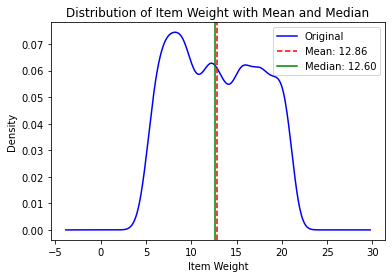

In [24]:
# Plot the KDE (Kernel Density Estimate) for Item_Weight
data['Item_Weight'].plot(kind='kde', label='Original', color='blue')

# Calculate the mean and median
mean_value = data['Item_Weight'].mean()
median_value = data['Item_Weight'].median()

# Plot the mean and median on the same graph
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')

# Add labels and legend
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.title('Distribution of Item Weight with Mean and Median')
plt.legend()

# Show the plot
plt.show()


In [25]:
data['Item_Weight'] = data.Item_Weight.fillna(data.Item_Weight.mean())
data['Item_Weight'] = data.Item_Weight.fillna(data.Item_Weight.median())

In [26]:
data.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Outlet_Size

In [27]:
# filling the missing values in "Outlet_Size" column with Mode
Data_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
Data_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
miss_values = data['Outlet_Size'].isnull()
miss_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [29]:
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: Data_size[x])

In [30]:
# checking for missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Item_Fat_Content

In [31]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [34]:
data['Item_Fat_Content'].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

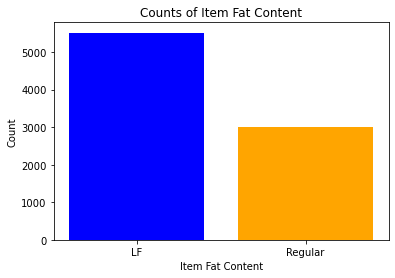

In [35]:
# Count occurrences
counts = data['Item_Fat_Content'].value_counts()

# Create bar plot
plt.bar(counts.index, counts.values, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.title('Counts of Item Fat Content')

# Show plot
plt.show()

### Item visibility

In [36]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [37]:
# Replace 0 with NaN in the 'Item_Visibility' column
data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)

# Display the updated value counts
print(data['Item_Visibility'].value_counts())

0.076975    3
0.159165    2
0.074565    2
0.037550    2
0.058121    2
           ..
0.087380    1
0.024343    1
0.041823    1
0.023154    1
0.031007    1
Name: Item_Visibility, Length: 7879, dtype: int64


### Item_Type

In [38]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

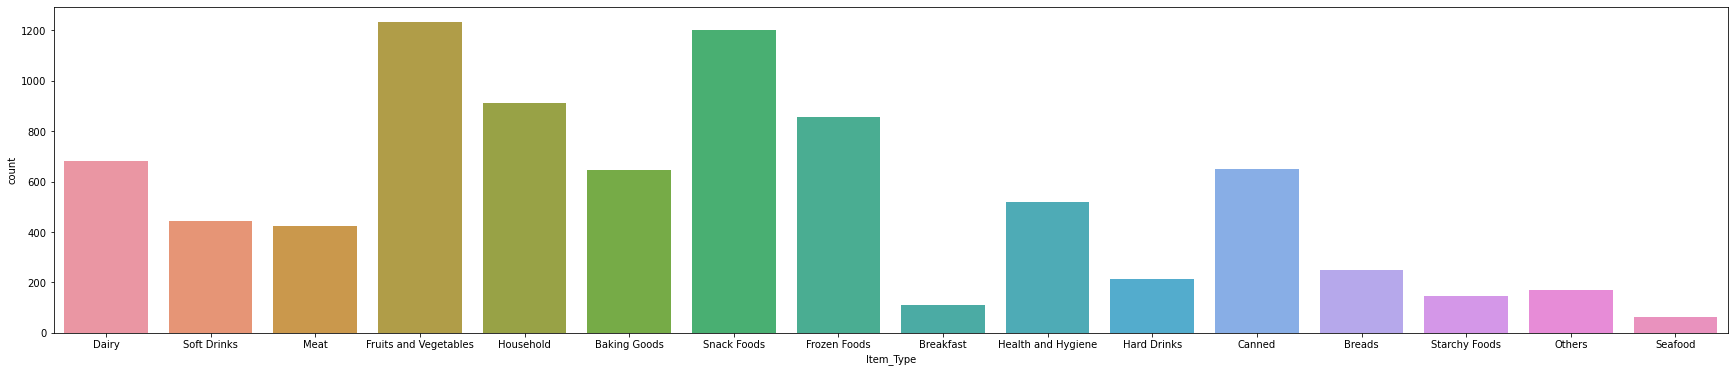

In [39]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

### Item_Identifier

In [40]:
data['Item_Identifier'].value_counts().sample(5)

NCM06    7
FDH05    6
FDV28    7
FDC39    4
FDF41    6
Name: Item_Identifier, dtype: int64

In [41]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])


In [42]:
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

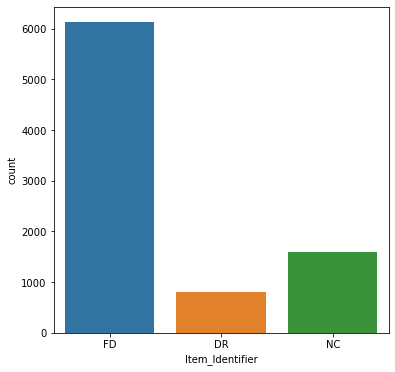

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Identifier', data=data)
plt.show()

### Outlet_Establishment_Year

In [44]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

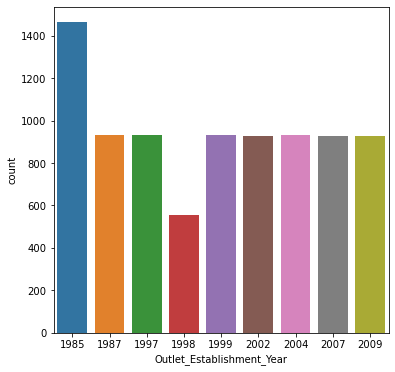

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

### Label Encoding

In [46]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

In [47]:

# Apply encoding to the specified columns in the 'data' DataFrame
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])


In [48]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,0,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,1,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1,19.20,1,NaN,6,182.0950,0,1998,2,2,0,732.3800
4,2,8.93,0,NaN,9,53.8614,1,1987,0,2,1,994.7052


### Splitting features and Target

In [49]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [50]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,0,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,1,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1,19.200,1,NaN,6,182.0950,0,1998,2,2,0
4,2,8.930,0,NaN,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,1,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,2,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,1,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [51]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Splitting the data into Training data & Testing Data

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
X.shape, X_train.shape, X_test.shape

((8523, 11), (6818, 11), (1705, 11))

Splitting the Data:

Input Features (X): The dataset contains 8523 rows and 11 columns of input features.

Target Variable (Y): The target variable, Item_Outlet_Sales, contains 8523 rows.

Training and Testing Split:

Training Set: 6818 rows (80% of the data).

Testing Set: 1705 rows (20% of the data).

## Machine Learning Model Training

### XGBoost Regressor

In [54]:
regressor = XGBRegressor()

In [55]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model: XGBoost Regressor (XGBRegressor) is used as the machine learning model.

Training: The model is trained on the training set (X_train and Y_train).

### Evaluation

In [56]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [57]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [58]:
print('R Squared value = ', r2_train)

R Squared value =  0.8677799953199729


Training Data: The R² value for the training data is 0.8694.

Interpretation: The model explains approximately 87% of the variance in the Item_Outlet_Sales for the training data. This indicates a strong fit on the training set, suggesting that the model has learned the patterns well from the training data.

In [59]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [60]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [61]:
print('R Squared value = ', r2_test)

R Squared value =  0.5278392270342911


Testing Data: The R² value for the testing data is 0.5278.

Interpretation: The model explains approximately 52% of the variance in the Item_Outlet_Sales for the testing data. This lower value compared to the training data suggests that the model's performance on unseen data (the test set) is moderate but not as strong as on the training set. This discrepancy could be an indication of overfitting—where the model performs well on the training data but does not generalize as well to new, unseen data.

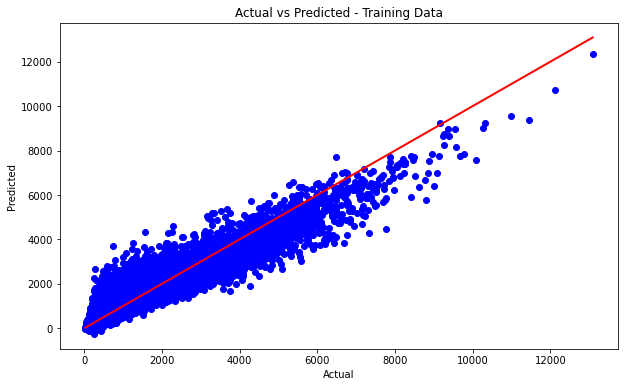

In [62]:
# Plotting the actual vs predicted values for training data
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted - Training Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Model Performance: The model shows a reasonable fit for the majority of the training data, as many points are close to the red line. However, the increasing spread of points, especially at higher sales values, suggests that the model might not be as accurate in predicting extreme values, which could contribute to the overfitting observed earlier. Further tuning or using additional features might help improve the predictions for these higher values.